<a href="https://colab.research.google.com/github/PrzemyslawSarnacki/streetlifting-analysis/blob/main/coefficients_sob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/PrzemyslawSarnacki/streetlifting-analysis/blob/main/coefficients.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a> 

# Siła relatywna vs Siła absolutna

Na samym początku należałoby się zastanowić jakim sportem chce być StreetLifting. Czy będzie to sport, w którym liczy się wyłącznie siła absolutna jak ma to miejsce w zawodach Strongman, czy porównujący siłę relatywną względem masy ciała zawodnika jak ma to miejsce w trójboju siłowym. 

Jeżeli jedynie siła absolutna nas interesuje to w takim razie jedynym kryterium porównawczym powinien być total, czyli suma ciężaru podniesionego we wszystkich bojach. Nie powinna mieć znaczenia waga zawodnika, ani relacja jego wagi do ciężaru podniesionego, gdyż interesuje nas jedynie wyłonienie zawodnika, który podniesie najwięcej.

W tej sytuacji stosowanie wszelkich współczynników jak Wilks, ISF etc. nie powinno mieć zastosowania. Kwestia dorzucania przysiadów do takich zawodów też jest dyskusyjna. 

W celu zobrazowania sytuacji posłużę się najlepszymi wynikami z Mistrzostw Polski w StreetLifting w bieżącym 2022 roku. Zdaję sobie sprawę, że jest to dość mała próbka danych, ale SL jako raczkujący sport nie ma ogromu danych i statystyk jak to ma miejsce w przypadku trójboju siłowego. 

In [1]:
import math

# calculate allometric scaling score 
def calculate_as(bodyweight, weight_lifted):
  return weight_lifted * bodyweight ** (-2/3)

def calculate_wilks(bodyweight, weight_lifted):
  result = weight_lifted*500/ (-216.0475144 + bodyweight*16.2606339 + bodyweight ** 2 *-0.002388645 + bodyweight ** 3 * -0.00113732 + bodyweight ** 4 * 7.01863E-06 + bodyweight ** 5 * -1.291E-08)
  return result

def calculate_isf(bodyweight, weight_lifted):
  a = 799.81893
  b = 681.45441
  c = 0.00614
  extra_points = 0
  if bodyweight > 95:
    extra_points = (bodyweight - 95) *0.5
  return (100/(a - b * math.exp(-c * bodyweight))) * weight_lifted + extra_points

def calculate_ipf(bodyweight, weight_lifted):
 a = 1199.72839 
 b = 1025.18162 
 c = 0.00921
 result = (100/(a - b * math.exp(-c * bodyweight))) * weight_lifted
 return result


In [2]:
def find_weight_lifted(score, bodyweight):
 return score / bodyweight ** (- 2/3)

In [3]:
find_weight_lifted(54.14, 123)

1339.023890753689

In [4]:
import pandas as pd

wilks = []
ipf  = []
isf = []
bodyweight = []
rows = []
for b in range(50, 120):
  isf = (calculate_isf(b, find_weight_lifted(54.14, b)))
  ipf = (calculate_ipf(b, find_weight_lifted(54.14, b)))
  wilks = (calculate_wilks(b, find_weight_lifted(54.14, b)))

  rows.append([b, wilks, isf, ipf])



df = pd.DataFrame(rows, columns=["bodyweight", "wilks", "isf", "ipf"])


W poniższej tabelce zamieściłem całkowity ciężar (total), całkowity ciężar pomijając przysiad (total-sq) oraz całkowity ciężar z wliczoną masą ciała (total+bw).

In [5]:
data = {'bodyweight':[68.5, 80.1, 86.9, 100.2],'total':[160+90+120, 170+90+142.5, 210+70+145, 235+60+122.5],'total-sq':[90+120, 90+142.5, 70+145, 60+122.5], 'total+bw':[160+90+120+68.5*2, 170+90+142.5+80.1*2, 210+70+145+86.9*2, 235+60+122.5+100.2*2] }  


best_glogau = pd.DataFrame(data)
best_glogau

,bodyweight,total,total-sq,total+bw
0,68.5,370.0,210.0,507.0
1,80.1,402.5,232.5,562.7
2,86.9,425.0,215.0,598.8
3,100.2,417.5,182.5,617.9


Możemy zauważyć, że wyłonienie zwycięzcy jest dość kłopotliwe w zależności od tego jakie kryterium przyjmiemy. Generalizując wliczenie wagi zawodnika premiuje zawodników najcięższych, pominięcie masy ciała premiuje zawodników z pośrednich kategorii wagowych, a pominięcie przysiadu premiuje zawodników najlżejszych. Nie jest to problem jeśli decydujemy się na pozostawienie sportu jako mierzącego siłę absolutną. Wtedy pozostawiając pewne transparentne kryteria poszukujemy zawodników, którzy będą prezentować cechy pozwalające na podniesienie największego ciężaru w określonych bojach. 

# Siła relatywna

W przypadku gdy chcemy wyłonić zawodników posiadających największą siłę relatywną względem masy ciała sprawa się nieco komplikuje. Zasadne jest w takim wypadku użycie współczynników umożliwiających miarodajne porównanie wyników. Większość z tych współczynników posiada pewne wady. Aby je przeanalizować przyrównajmy je utrzymując jako stałą współczynnik skalowania alometrycznego. Jest to teoretyczny wskaźnik zakładający, że masa ciała będzie rosła szybciej niż siła. Sprawdza się on w praktyce i [środowisko naukowe](https://www.asep.org/asep/asep/Vander.html) twierdzi, że jest to idealny sposób na skalowanie wyników siłowych.

Na pierwszy rzut idzie popularny współczynnik Wilks. Jest to już dość stary współczynnik, którego korzenie sięgają lat 90. Powstał na bazie danych z zawodów w trójboju siłowym i powszechnie uważa się, że nie jest to najlepszy wybór w dzisiejszych czasach, ponieważ wyniki w trójboju siłowym przez te 30 lat sporo się zmieniły oraz sam współczynnik cierpi na zjawisko zwane nadmiernym dopasowaniem.  

Jak możemy zauważyć na poniższym wykresie Wilks faworyzuje zawodników najlżejszych oraz najcięższych (nawet w większym stopniu) przy czym zawodnicy w pośrednich kategoriach są dyskryminowani. 

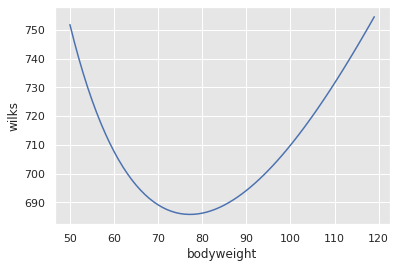

In [6]:
import seaborn as sns
sns.set("notebook", style='ticks', font_scale=1.0)
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.lineplot(
    data=df,
    x="bodyweight", y="wilks", markers=True, dashes=False
)



Współczynnik IPF Points powstał, aby wyeliminować problemy związane z Wilksem. Jest aktualizowany co kilka lat i jego współczynniki są dobierane na podstawie oficjalnych danych federacji IPF [(szczegóły tutaj)](https://www.powerlifting.sport/rules/codes/info/ipf-formula). Jest ściśle powiązany z współczynnikiem skalowania alometrycznego co możemy zauważyć na wykresie. Współczynnik ten nie jest idealny co autorzy podkreślają jednak w porównaniu do Wilksa jest to spory krok naprzód.    

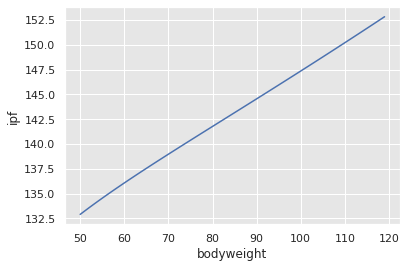

In [7]:
sns.lineplot(
    data=df,
    x="bodyweight", y="ipf", markers=True, dashes=False
)


Współczynnik ISF powstał na bazie IPF points (jest to identyczna formuła). Nieznany jest jednak motyw doboru stałych oraz dorzucania punktów dla zawodników cięższych. Autorzy milczą w obu kwestiach [źródło](https://streetlifting.ru/en/points/). 

Jak możemy zauważyć na wykresie sytuacja wygląda bardzo podobnie jak to ma miejsce w przypadku IPF points. Zakres punktów jest jednak dwukrotnie większy, a zawodnicy powyżej 95 kg (w przypadku totala) zostali obdarzeni bonusowymi punktami. Można to traktować jako błędne dobranie współczynników, które autorzy kompensują poprawką w postaci dodatkowych punktów, albo błędne założenia względem współczynnika. 

Z całą pewnością powyżej 95 kg nie dzieje się jakaś magia, która by usprawiedliwiała premiowanie zawodnika ważącego 96 kg względem tego, który waży 94 kg. 

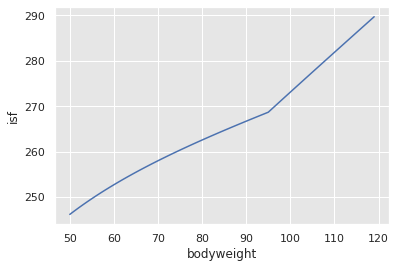

In [8]:
sns.lineplot(
    data=df,
    x="bodyweight", y="isf", markers=True, dashes=False
)

# Masa zawodnika

Czy masa zawodnika powinna być wliczana do ciężaru podnoszonego? Jest to zagadnienie, w którym odpowiedź powinna posiadać fizyka oraz statystyka.

O ile nie posiadamy danych pochodzących stricte z StreetLifting to trójbój siłowy jest dyscypliną badaną od lat. 

Na poniższym wykresie możemy zauważyć, że wynik w wyciskaniu leżąc jest silnie skorelowany z powierzchnią beztłuszczowej masy ciała. Powinno to świadczyć o tym, że ten sam zawodnik po nabraniu odpowiedniej ilości beztłuszczowej masy ciała powinien być w stanie podnieść większy ciężar. Jest to logiczne i tłumaczy czemu zawodnicy są dzieleni na kategorie wagowe i dlaczego w sportach mierzących siłę relatywną używa się współczynników. 

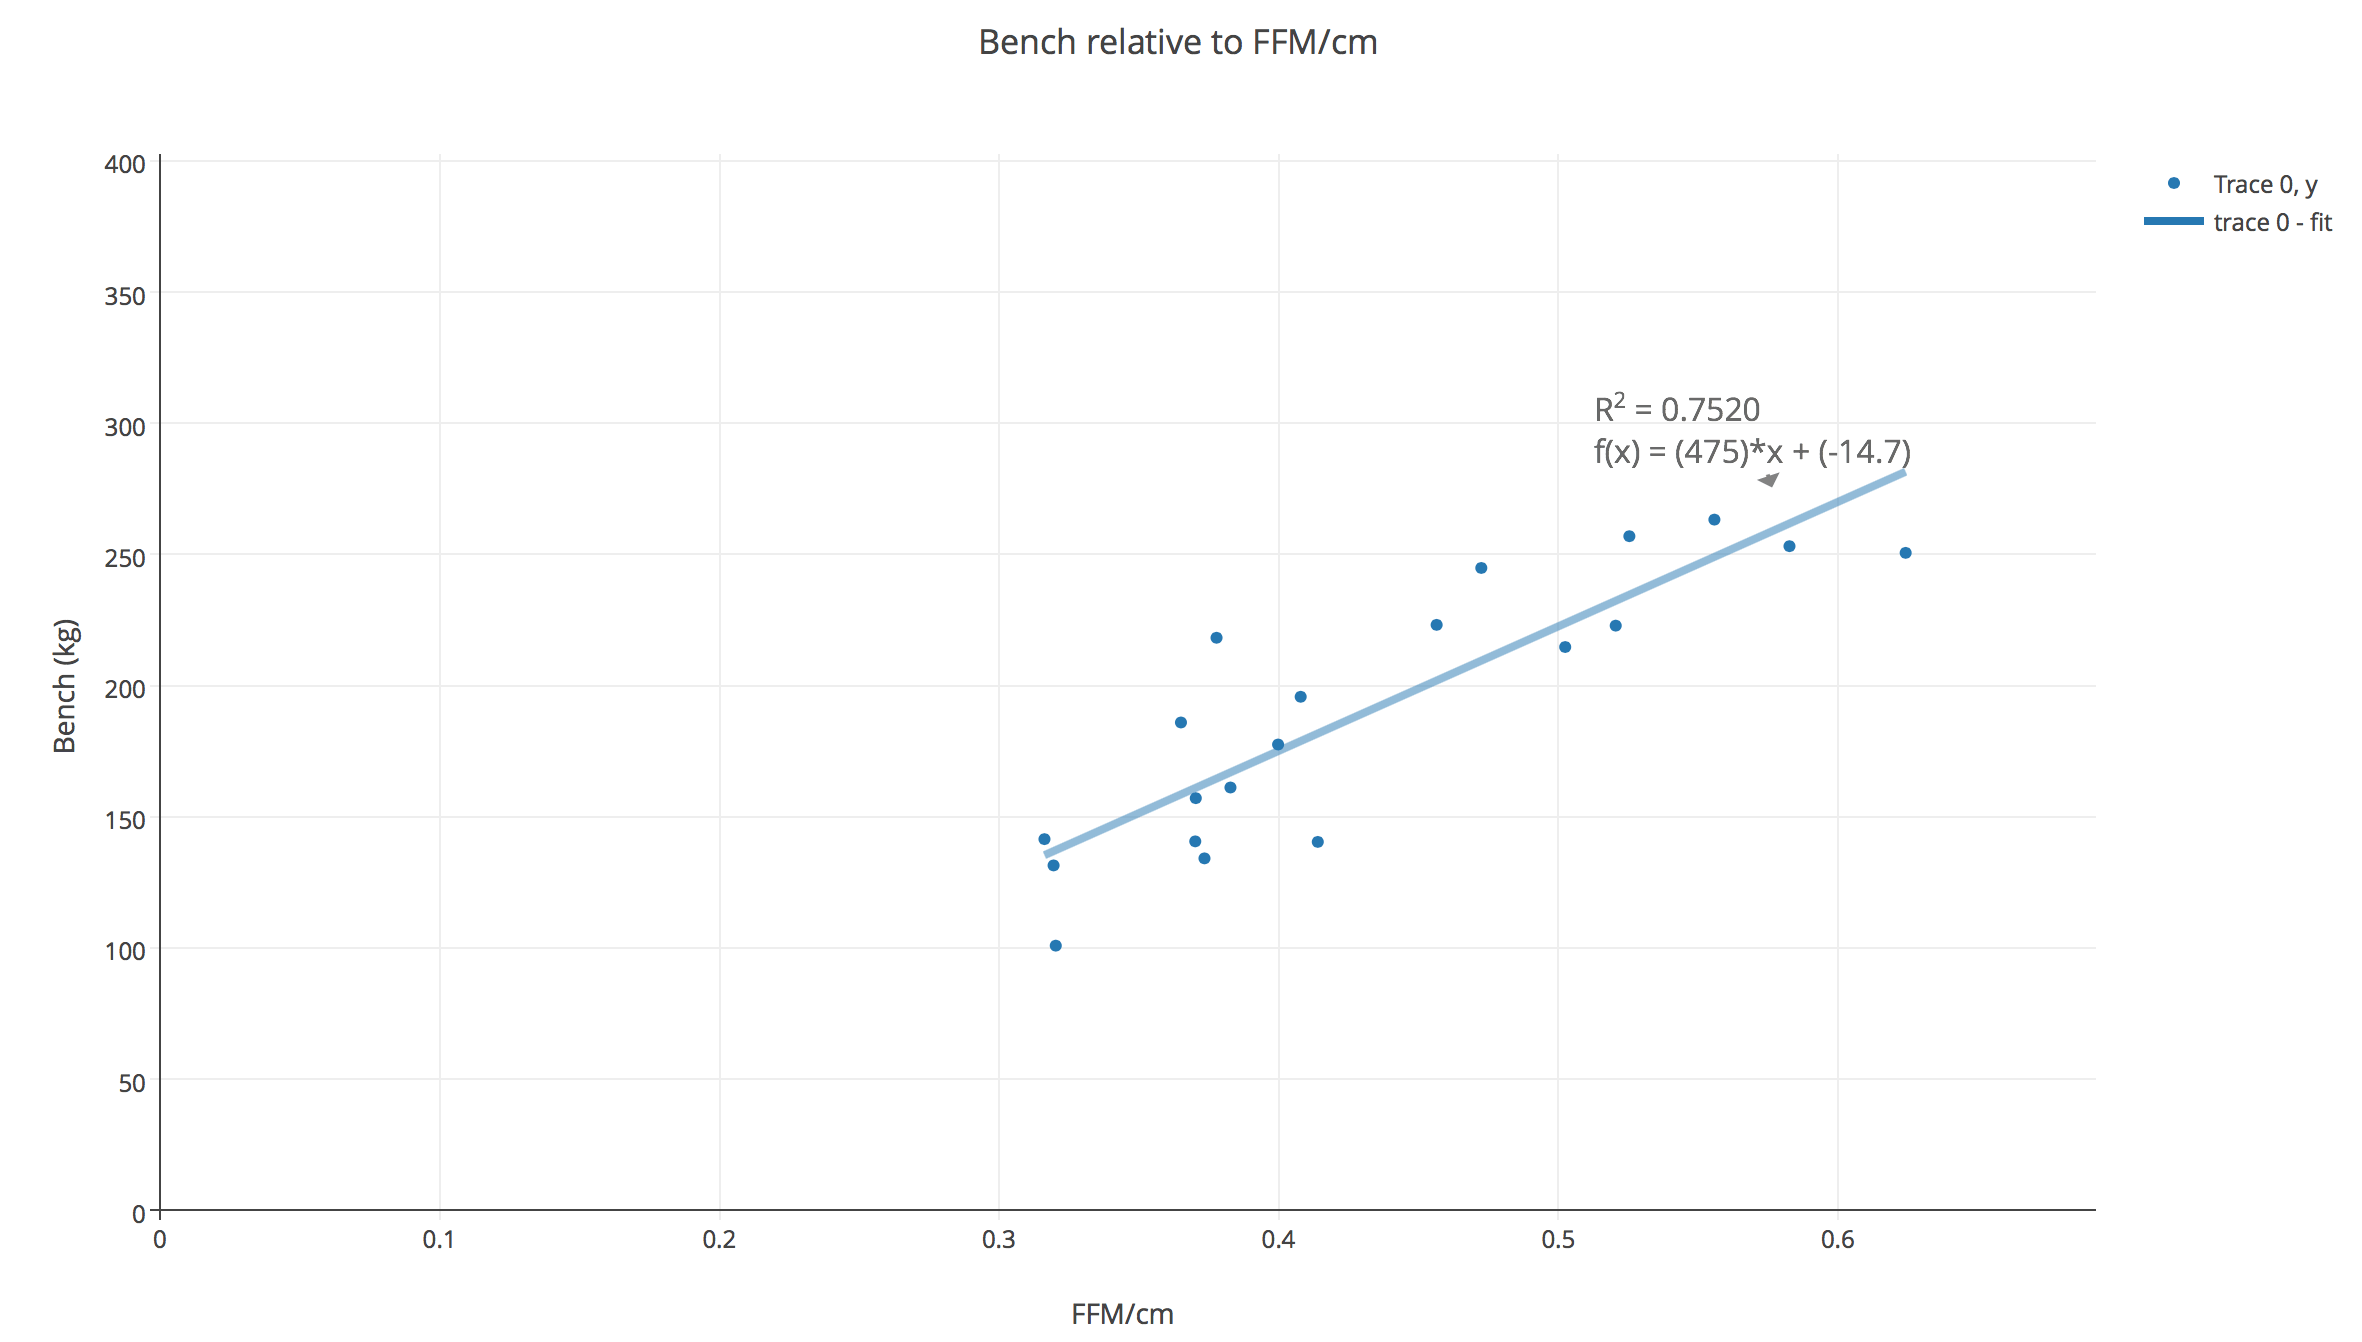

Jeśli zwizualizujemy wektory siły to wydaje się logiczne, że zawodnik posiadający włókna mięśniowe zdolne do wygenerowania siły o wartości większej niż 1764N powinien być w stanie podnieść ciężar o wadze 180kg. 

Siła z jaką sztanga dąży do zderzenia z podłożem jest wyłącznie zależna od masy sztangi wraz z obciążeniem oraz przyspieszenia grawitacyjnego.

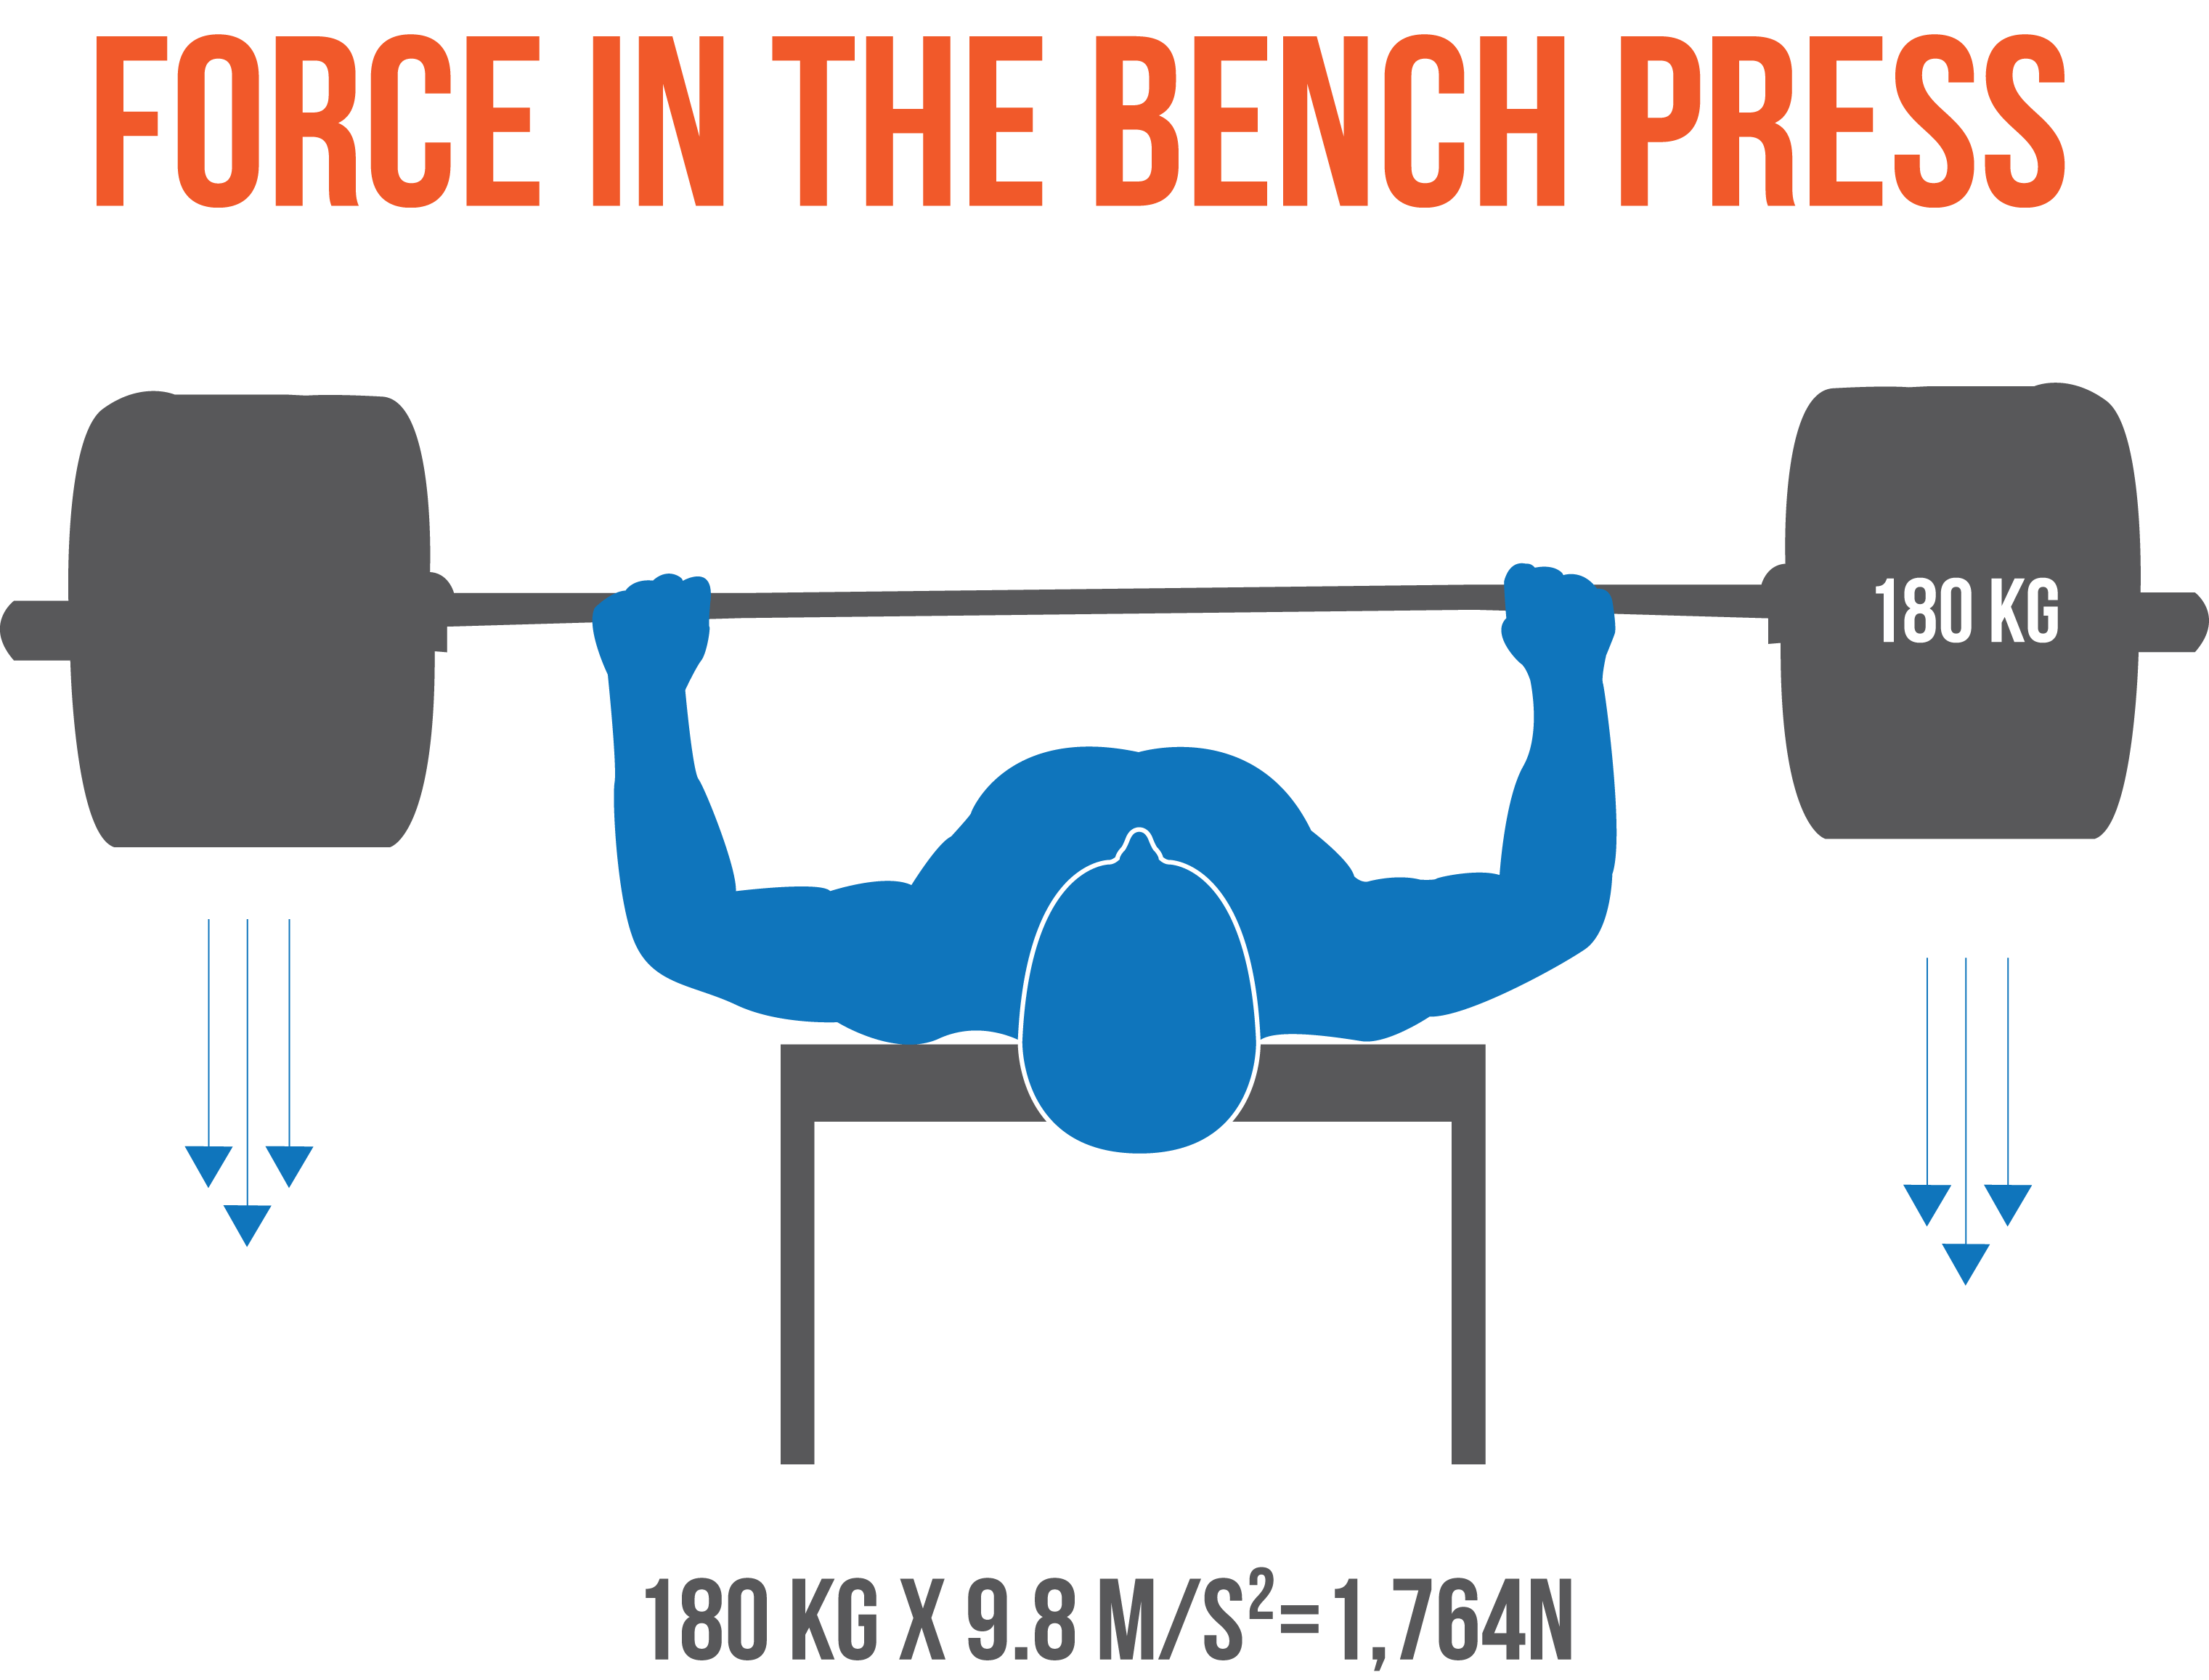

W przypadku podciągania na drążku posiadamy analogiczną sytuację. Zawodnik jednak zamiast podnosić sztangę przenosi swoje ciało w przestrzeni. Jednak jego masa ciała jest nadal ciężarem podnoszonym w tym ćwiczeniu. Zakładając podwieszony ciężar to wzór na siłę, będzie wyglądać następująco:

F = (m + mc) * g


,gdzie:


m - masa zawodnika

mc - masa ciężaru

g - przyspieszenie grawitacyjne

Biorąc pod uwagę powyższe, ciężar zawodnika powinien być wliczany jako ciężar podnoszony podczas wykonywania boju. 

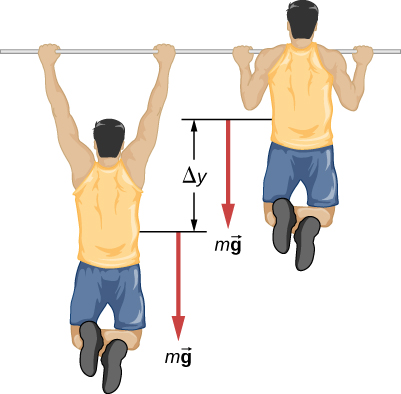

Poniżej przygotowałem tabelkę porównującą różne metody wykorzystania przeliczników. Co ciekawe miejsca na podium znacząco różnią się w zależności od wybranego przelicznika oraz tego czy waga będzie wliczana czy nie. Natomiast wyrzucenie przysiadu zmienia obraz sytuacji o 180 stopni. 



In [9]:
best_glogau['wilks'] = best_glogau.apply(lambda row: calculate_wilks(row['bodyweight'], row['total']), axis=1)
best_glogau['isf'] = best_glogau.apply(lambda row: calculate_isf(row['bodyweight'], row['total']), axis=1)
best_glogau['ipf'] = best_glogau.apply(lambda row: calculate_ipf(row['bodyweight'], row['total']), axis=1)
best_glogau['as'] = best_glogau.apply(lambda row: calculate_as(row['bodyweight'], row['total']), axis=1)
best_glogau['wilks+bw'] = best_glogau.apply(lambda row: calculate_wilks(row['bodyweight'], row['total+bw']), axis=1)
best_glogau['isf+bw'] = best_glogau.apply(lambda row: calculate_isf(row['bodyweight'], row['total+bw']), axis=1)
best_glogau['ipf+bw'] = best_glogau.apply(lambda row: calculate_ipf(row['bodyweight'], row['total+bw']), axis=1)
best_glogau['as+bw'] = best_glogau.apply(lambda row: calculate_as(row['bodyweight'], row['total+bw']), axis=1)
best_glogau['wilks-sq'] = best_glogau.apply(lambda row: calculate_wilks(row['bodyweight'], row['total-sq']), axis=1)
best_glogau['isf-sq'] = best_glogau.apply(lambda row: calculate_isf(row['bodyweight'], row['total-sq']), axis=1)
best_glogau['ipf-sq'] = best_glogau.apply(lambda row: calculate_ipf(row['bodyweight'], row['total-sq']), axis=1)
best_glogau['as-sq'] = best_glogau.apply(lambda row: calculate_as(row['bodyweight'], row['total-sq']), axis=1)


best_glogau

,bodyweight,total,total-sq,total+bw,wilks,isf,ipf,as,wilks+bw,isf+bw,ipf+bw,as+bw,wilks-sq,isf-sq,ipf-sq,as-sq
0,68.5,370.0,210.0,507.0,281.968589,105.013524,56.556931,22.100801,386.373174,143.896910,77.498280,30.284070,160.036226,59.602271,32.099879,12.543698
1,80.1,402.5,232.5,562.7,274.570058,105.064339,56.731373,21.660952,383.852352,146.881251,79.311164,30.282280,158.602580,60.689339,32.770296,12.512227
2,86.9,425.0,215.0,598.8,276.373407,106.213017,57.491063,21.662525,389.393874,149.647893,81.001526,30.521224,139.812430,53.731291,29.083714,10.958689
3,100.2,417.5,182.5,617.9,253.883681,99.359810,52.692461,19.352838,375.747848,145.804519,77.984843,28.642201,110.979094,44.896204,23.033232,8.459624



Czy Przysiad powinien być uwzględniany w sporcie takim jak StreetLifting? To zależy od tego do czego dąży ta dyscyplina.

Jeżeli celem jest wyłonienie najlepszego zawodnika pod kątem jedynie dipów i podciągania wtedy nieuwzględnianie przysiadu jest dobrą opcją. Takie rozwiązanie niesie za sobą pewne zalety takie jak łatwiejsza organizacja zawodów (nie potrzeba stojaków, asekuracji). 

Jednak jeżeli celem jest wyłonienie zawodnika silnego ogółem względem masy ciała to wtedy uwzględnienie przysiadu jest koniecznym ruchem. Ma to pewne zalety, które prowadzą do niezaniedbywania treningu dolnych partii ciała przez zawodników. Wadą jest jednak trudniejsza organizacja takich zawodów w plenerze. 

# Podsumowanie 

- Przeliczniki nie są świętym graalem i mają swoje wady, 
- StreetLifting jako sport posiada za mało danych, aby opracować międzynarodowy współczynnik, 
- Współczynnik ISF jest oparty na złych założeniach,
- Ciężar zawodnika jest w rzeczywistości cieżarem podnoszonym, 
- Kwestia Przysiadu w StreetLiftingu jest dyskusyjna,
- StreetLifting jako sport wymaga dyskusji community na temat jego standaryzacji

Analiza ta z pewnością nie jest idealna i była inspirowana w dużej mierze oparta na artykułach Grega Nuckolsa, a w szczególności:

https://www.strongerbyscience.com/whos-the-most-impressive-powerlifter/

Jestem otwarty na krytykę i zezwalam na wszelkie modyfikacje tej analizy i uźycie jej fragmentów.

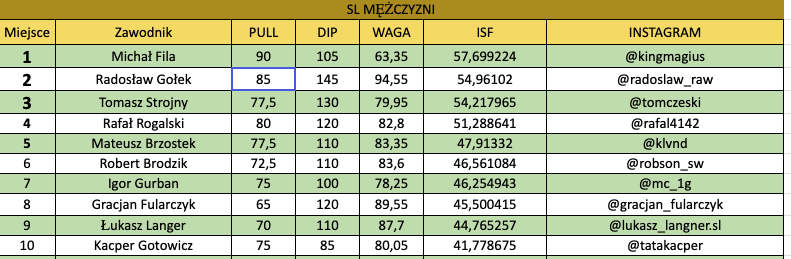

In [14]:
data_sob = {'bodyweight':[63.35, 94.55, 79.95, 82.8, 83.35, 83.6, 78.25, 89.55, 87.55, 80.05],'total':[90+105, 85+145, 77.5+130, 80+120, 77.5+110, 72.5+110, 75+100, 120+65, 110+70, 75+85],'total+bw':[90+105+63.35*2, 85+145+94.55*2, 77.5+130+79.95*2, 80+120+82.8*2, 77.5+110+83.35*2, 72.5+110+83.6*2, 75+100+78.25*2, 120+65+89.55*2, 110+70+87.55*2, 75+85+80.05*2] }  


best_sob = pd.DataFrame(data_sob)

In [15]:
def calculate_isf_without_extras(bodyweight, weight_lifted):
  a = 799.81893
  b = 681.45441
  c = 0.00614
  extra_points = 0
  return (100/(a - b * math.exp(-c * bodyweight))) * weight_lifted + extra_points


In [16]:
best_sob['wilks'] = best_sob.apply(lambda row: calculate_wilks(row['bodyweight'], row['total']), axis=1)
best_sob['isf'] = best_sob.apply(lambda row: calculate_isf(row['bodyweight'], row['total']), axis=1)
best_sob['ipf'] = best_sob.apply(lambda row: calculate_ipf(row['bodyweight'], row['total']), axis=1)
best_sob['as'] = best_sob.apply(lambda row: calculate_as(row['bodyweight'], row['total']), axis=1)
best_sob['wilks+bw'] = best_sob.apply(lambda row: calculate_wilks(row['bodyweight'], row['total+bw']), axis=1)
best_sob['isf+bw'] = best_sob.apply(lambda row: calculate_isf_without_extras(row['bodyweight'], row['total+bw']), axis=1)
best_sob['ipf+bw'] = best_sob.apply(lambda row: calculate_ipf(row['bodyweight'], row['total+bw']), axis=1)
best_sob['as+bw'] = best_sob.apply(lambda row: calculate_as(row['bodyweight'], row['total+bw']), axis=1)

best_sob

,bodyweight,total,total+bw,wilks,isf,ipf,as,wilks+bw,isf+bw,ipf+bw,as+bw
0,63.35,195.0,321.7,158.485708,57.699203,31.065313,12.270724,261.460781,95.188891,51.249801,20.243549
1,94.55,230.0,419.1,143.375691,54.961000,29.847927,11.082051,261.255443,100.148501,54.388113,20.193424
2,79.95,207.5,367.4,141.715837,54.217945,29.274573,11.180789,250.922402,95.998425,51.833630,19.796732
3,82.80,200.0,365.6,133.691292,51.288623,27.719084,10.527933,244.387682,93.755602,50.670486,19.245061
4,83.35,187.5,354.2,124.845565,47.913302,25.899909,9.826470,235.841595,90.511423,48.926654,18.562857
5,83.60,182.5,349.7,121.303010,46.561067,25.171198,9.545354,232.436508,89.218659,48.232153,18.290466
6,78.25,175.0,331.5,121.180279,46.254927,24.962222,9.565665,229.550072,87.620047,47.285581,18.120102
7,89.55,185.0,364.1,118.405857,45.500398,24.655224,9.242611,233.035527,89.549703,48.524147,18.190457
8,87.55,180.0,355.1,116.581213,44.806077,24.258964,9.129249,229.988826,88.392433,47.857544,18.009980
9,80.05,160.0,320.1,109.188774,41.778660,22.558781,8.614150,218.445792,83.583432,45.131662,17.233684


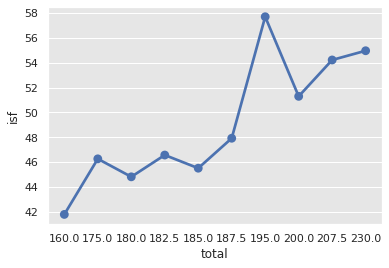

In [21]:
sns.pointplot(data=best_sob, x="total", y="isf")


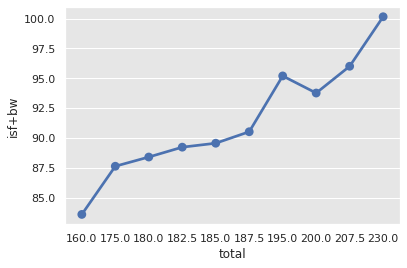

In [28]:
sns.pointplot(data=best_sob, x="total", y="isf+bw")


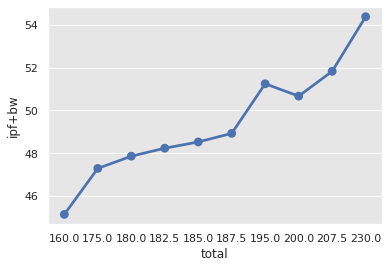

In [24]:
sns.pointplot(data=best_sob, x="total", y="ipf+bw")


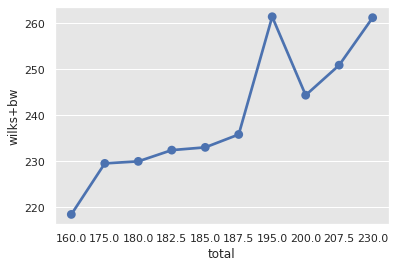

In [26]:
sns.pointplot(data=best_sob, x="total", y="wilks+bw")